# Beta Bank Churn Project:

- Customers are leaving the bank slowly, financially it makes most since to retain customers rather than attract new ones.
- The goal is to create a model to predict whether customers will leave the bank.
- Our target for model testing will be a minimum F1 score of 0.59.
- Models tested will include: Logistic Regression, Decision Tree Classifier, Random Forest Classifier.

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

## Data Preperation:


In [2]:
data = pd.read_csv('Churn.csv')
display(data.head())
data.info()
#display(data['Tenure'].value_counts())
#display(data['Geography'].value_counts())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [3]:
print(data.isnull().sum())
print(data.describe())


RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64
         RowNumber    CustomerId   CreditScore           Age       Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  9091.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800     4.997690   
std     2886.89568  7.193619e+04     96.653299     10.487806     2.894723   
min        1.00000  1.556570e+07    350.000000     18.000000     0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000     2.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000     5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000     7.000000   
max    10000.00000  1.581569e+07    850.000000   

In [4]:
data['Tenure'] = data['Tenure'].fillna(data['Tenure'].median())
print(data.isnull().sum())
display(data.describe())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.99790,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.76001,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.00000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.00000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.00000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.00000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.00000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
display(data.head())

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [6]:
data['Tenure'] = data['Tenure'].astype('int64')
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


None

- Our data was fairly intact with only the Tenure column reflecting missing values. To handle this we filled the missing values with the median in an effort to not distort the data.
    - Before/After statistical analysis of the Tenure column reflects that our filling of missing values with the 'median' had negligable effect on its overall stats.
        - The mean changed from 4.99769 to 4.9979. This makes sense, our mean and median values are very close.
        - Std Dev also slightly changed from 2.894723 to 2.76001. This slight change is to be expected after filling 809 missing values. Because our mean and median are similar in value, a significant change in the std dev wasn't expected during our fill process. 
- RowNumber, CustomerID and Surname have been removed from the data since that information will not be relevant to our models success.
- Data Types adjusted to accurately reflect the data.


## Imbalance of Classes:

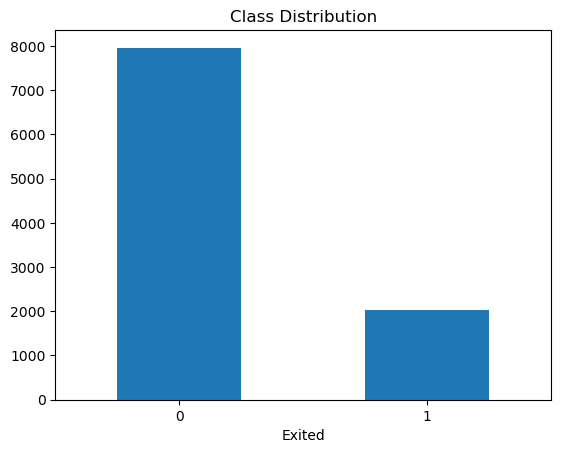

In [7]:
data['Exited'].value_counts().plot(kind='bar', rot=1)
plt.title('Class Distribution')
plt.show()

- Clearly our data reflects a large imbalance showing a roughly 4:1 ratio of customers that stay vs customers that leave. 
- This imbalance will need to be accounted for in the model training in order to accurately create a model that can predict customer churn.

## Initial Model Training:


In [8]:
data_ohe = pd.get_dummies(data, drop_first=True)
display(data_ohe.head(10))
target = data_ohe['Exited']
features = data_ohe.drop('Exited', axis=1)
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.5, random_state=12345)
features_valid, features_test, target_valid, target_test = train_test_split(features_valid, target_valid, test_size=0.5, random_state=12345)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
5,645,44,8,113755.78,2,1,0,149756.71,1,False,True,True
6,822,50,7,0.00,2,1,1,10062.80,0,False,False,True
7,376,29,4,115046.74,4,1,0,119346.88,1,True,False,False
8,501,44,4,142051.07,2,0,1,74940.50,0,False,False,True
9,684,27,2,134603.88,1,1,1,71725.73,0,False,False,True


In [9]:
# Logistic Regression with hyperparameter tuning for unbalanced data
best_c = 0
best_f1 = 0
for c in [0.01, 0.1, 1, 10]:
    model = LogisticRegression(solver='liblinear', C=c, random_state=12345)
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    current_f1 = f1_score(target_valid, predictions)
    print(f'C={c}, f1 score={current_f1}')
    if current_f1 > best_f1:
        best_f1 = current_f1
        best_c = c
print(f'Best C: {best_c}, Best f1 score: {best_f1}')

C=0.01, f1 score=0.11352253756260434
C=0.1, f1 score=0.11352253756260434
C=1, f1 score=0.11352253756260434
C=10, f1 score=0.11352253756260434
Best C: 0.01, Best f1 score: 0.11352253756260434


/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/lib/python3.

In [10]:
# Decision Tree Classifier with hyperparameter tuning for unbalanced data
best_depth = 0
best_f1 = 0
for depth in range(1, 11):
    model = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    current_f1 = f1_score(target_valid, predictions)
    print(f'Depth={depth}, f1 score={current_f1}')
    if current_f1 > best_f1:
        best_f1 = current_f1
        best_depth = depth
print(f'Best Depth: {best_depth}, Best f1 score: {best_f1}')


Depth=1, f1 score=0.0
Depth=2, f1 score=0.49158249158249157
Depth=3, f1 score=0.44660194174757284
Depth=4, f1 score=0.4707482993197279
Depth=5, f1 score=0.5246305418719212
Depth=6, f1 score=0.4826629680998613
Depth=7, f1 score=0.5303210463733651
Depth=8, f1 score=0.5182567726737338
Depth=9, f1 score=0.4988399071925754
Depth=10, f1 score=0.49002217294900224
Best Depth: 7, Best f1 score: 0.5303210463733651


In [ ]:
# Random Forest Classifier with hyperparameter tuning for unbalanced data
best_depth = 0
best_f1 = 0
best_est = 0
for depth in range(1, 26):
    for est in range(1,51):
        model = RandomForestClassifier(max_depth=depth, n_estimators=est, random_state=12345)
        model.fit(features_train, target_train)
        predictions = model.predict(features_valid)
        current_f1 = f1_score(target_valid, predictions)
        #print(f'Depth={depth}, Estimators={est}, f1 score={current_f1}')
        if current_f1 > best_f1:
            best_f1 = current_f1
            best_depth = depth
            best_est = est
print(f'Best Depth: {best_depth}, Best Estimators: {best_est}, Best f1 score: {best_f1}')


Depth=1, Estimators=1, f1 score=0.2222222222222222
Depth=1, Estimators=2, f1 score=0.21649484536082475
Depth=1, Estimators=3, f1 score=0.0
Depth=1, Estimators=4, f1 score=0.0
Depth=1, Estimators=5, f1 score=0.1042830540037244
Depth=1, Estimators=6, f1 score=0.0
Depth=1, Estimators=7, f1 score=0.0
Depth=1, Estimators=8, f1 score=0.0
Depth=1, Estimators=9, f1 score=0.0
Depth=1, Estimators=10, f1 score=0.0
Depth=1, Estimators=11, f1 score=0.0
Depth=1, Estimators=12, f1 score=0.0
Depth=1, Estimators=13, f1 score=0.0
Depth=1, Estimators=14, f1 score=0.0
Depth=1, Estimators=15, f1 score=0.0
Depth=1, Estimators=16, f1 score=0.0
Depth=1, Estimators=17, f1 score=0.0
Depth=1, Estimators=18, f1 score=0.0
Depth=1, Estimators=19, f1 score=0.0
Depth=1, Estimators=20, f1 score=0.0
Depth=1, Estimators=21, f1 score=0.0
Depth=1, Estimators=22, f1 score=0.0
Depth=1, Estimators=23, f1 score=0.0
Depth=1, Estimators=24, f1 score=0.0
Depth=1, Estimators=25, f1 score=0.0
Depth=1, Estimators=26, f1 score=0.0
D

- Before model testing our data needed to be properly Encoded as well as split into: Training, Validation and Test sets.
- Baselines of each model we produced before we address the issue of imbalance of classes. This will help us to better understand how the models are working as we address imbalance.
- Of the 3 models tested: RandomForestClassifier ranks highest so far with an F1 Score of 0.56 and an Accuracy Score of 0.85.

## Balancing Classes:

### Class Weight:
- For each model we will use the built in class_weight = 'balanced' parameter to account for the imbalance in our data.
- Results will be compared to our baseline as well as further class balancing techniques.

In [12]:
# Logistic Regression with class_weight='balanced' and hyperparameter tuning
best_c = 0
best_f1 = 0
for c in [0.01, 0.1, 1, 10]:
    model = LogisticRegression(solver='liblinear', C=c, random_state=12345, class_weight='balanced')
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    current_f1 = f1_score(target_valid, predictions)
    print(f'C={c}, f1 score={current_f1}')
    if current_f1 > best_f1:
        best_f1 = current_f1
        best_c = c
print(f'Best C with class_weight=balanced: {best_c}, Best f1 score: {best_f1}')


C=0.01, f1 score=0.4464871963230466
C=0.1, f1 score=0.46630727762803237
C=1, f1 score=0.4674278038952317
C=10, f1 score=0.44041450777202074
Best C with class_weight=balanced: 1, Best f1 score: 0.4674278038952317


/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/lib/python3.

In [13]:
# Decision Tree Classifier with class_weight='balanced' with hyperparameter tuning

best_depth = 0
best_f1 = 0
for depth in range(1, 11):
    model = DecisionTreeClassifier(max_depth=depth, random_state=12345, class_weight='balanced')
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    current_f1 = f1_score(target_valid, predictions)
    print(f'Depth={depth}, f1 score={current_f1}')
    if current_f1 > best_f1:
        best_f1 = current_f1
        best_depth = depth
print(f'Best Depth with class_weight=balanced: {best_depth}, Best f1 score: {best_f1}')


Depth=1, f1 score=0.46296296296296297
Depth=2, f1 score=0.49064449064449067
Depth=3, f1 score=0.49064449064449067
Depth=4, f1 score=0.5211267605633803
Depth=5, f1 score=0.5325596389426177
Depth=6, f1 score=0.5620805369127517
Depth=7, f1 score=0.5476550680786687
Depth=8, f1 score=0.5603305785123966
Depth=9, f1 score=0.5103011093502378
Depth=10, f1 score=0.5175292153589316
Best Depth with class_weight=balanced: 6, Best f1 score: 0.5620805369127517


In [26]:
# Random Forest Classifier with class_weight='balanced' with hyperparameter tuning
best_depth = 0
best_f1 = 0
best_est = 0
for depth in range(1, 26):
    for est in range(1,51):
        model = RandomForestClassifier(max_depth=depth, n_estimators=est, random_state=12345, class_weight='balanced')
        model.fit(features_train, target_train)
        predictions = model.predict(features_valid)
        current_f1 = f1_score(target_valid, predictions)
        #print(f'Depth={depth}, Estimators={est}, f1 score={current_f1}')
        if current_f1 > best_f1:
            best_f1 = current_f1
            best_depth = depth
            best_est = est
print(f'Best Depth with class_weight=balanced: {best_depth}, Best Estimators: {best_est}, Best f1 score: {best_f1}, Best accuracy score: {accuracy_score(target_valid, model.predict(features_valid))} ')


Best Depth with class_weight=balanced: 9, Best Estimators: 21, Best f1 score: 0.5928705440900562, Best accuracy score: 0.8488 


- Initial efforts to account for class imbalance was to take the simplistic apprach of class_weight.
- Each model was directed to used a balanced class weight.
- The Logistic Regression model showed the most imporvement compared to baseline results with an improved F1 Score of 0.46.
- However, all three models' F1 score improved with the implementation of our class balancing parameter. 
- Random Forest sets the bar with an F1 score of 0.59, impressive results!

### Upsampling:
- Through the use of upsampling we will now create balance in our data.
    - Our minority class '1' is now roughly equal to the once significant majority class of '0'.
    - Worth noting, our data now reflects just over 8,000 samples, down from the original 10,000 that we started with. 
    - This change in data is a by product of upsampling and isn't considered significant enough to effect the performance of our models. 

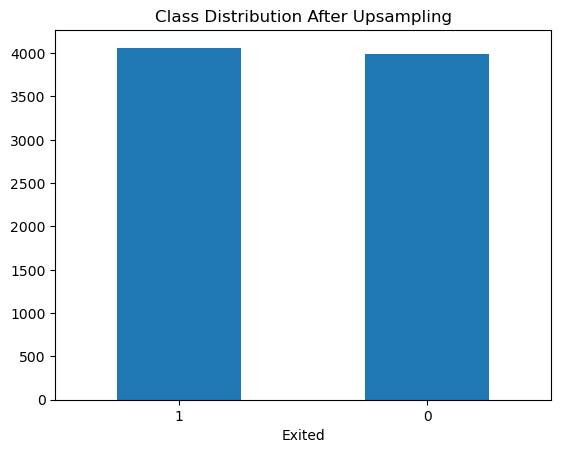

(8048, 11)
(8048,)


In [15]:
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.5, random_state=12345)
features_valid, features_test, target_valid, target_test = train_test_split(features_valid, target_valid, test_size=0.5, random_state=12345)

def upsample(features, target, repeat):
    features_ones = features[target == 1]
    target_ones = target[target == 1]
    features_zeros = features[target == 0]
    target_zeros = target[target == 0]
    
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
scaler = StandardScaler()
scaler.fit(features_upsampled[numeric])
features_upsampled[numeric] = scaler.transform(features_upsampled[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

target_upsampled.value_counts().plot(kind='bar',rot=1)
plt.title('Class Distribution After Upsampling')
plt.show()
print(features_upsampled.shape)
print(target_upsampled.shape)



In [16]:
# Logistic Regression hyperparameter tuning
best_c = 0
best_f1 = 0
for c in [0.01, 0.1, 1, 10]:
    model = LogisticRegression(solver='liblinear', random_state=12345, C=c)
    model.fit(features_upsampled, target_upsampled)
    predictions = model.predict(features_valid)
    current_f1 = f1_score(target_valid, predictions)
    print(f'C={c} => f1 score: {current_f1}, Accuracy Score: {accuracy_score(target_valid, predictions)}')
    if current_f1 > best_f1:
        best_f1 = current_f1
        best_c = c
print(f'Best C: {best_c} with f1 score: {best_f1}')


C=0.01 => f1 score: 0.4584487534626039, Accuracy Score: 0.6872
C=0.1 => f1 score: 0.45722108145106094, Accuracy Score: 0.6828
C=1 => f1 score: 0.45702592087312416, Accuracy Score: 0.6816
C=10 => f1 score: 0.45702592087312416, Accuracy Score: 0.6816
Best C: 0.01 with f1 score: 0.4584487534626039


/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/lib/python3.

In [17]:

# Decision Tree hyperparameter tuning
best_f1 = 0
best_depth = 0
for depth in range(1, 21):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_upsampled, target_upsampled)
    predictions = model.predict(features_valid)
    current_f1 = f1_score(target_valid, predictions)
    if current_f1 > best_f1:
        best_f1 = current_f1
        best_depth = depth
print("Best max_depth:", best_depth)
print("Best f1 score on validation set:", best_f1)




Best max_depth: 8
Best f1 score on validation set: 0.5589447650453421


Best max_depth: 21
Best est: 37
Best F1 Score: 0.5862068965517241
Accuracy Score: 0.842
Final Model Test Results:
f1 score: 0.6248693834900731
Accuracy Score: 0.8564


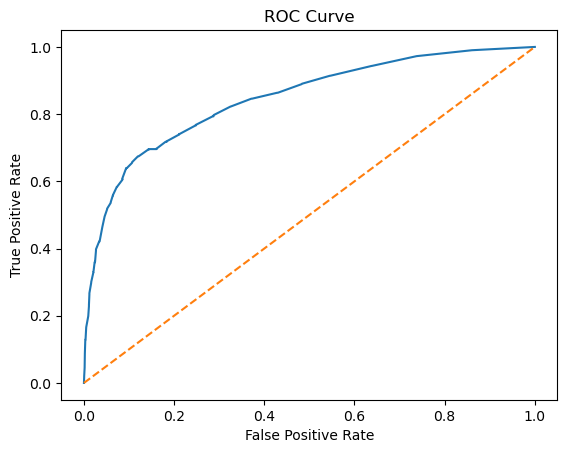

AUC-ROC: 0.8452220132616393


In [ ]:
# Random Forest hyperparameter tuning
best_score = 0
best_depth = 0
best_est=0
for depth in range(1, 26):
    for est in range(1, 51):
        model = RandomForestClassifier(max_depth=depth, n_estimators=est, random_state=12345)
        model.fit(features_upsampled, target_upsampled)
        predictions = model.predict(features_valid)
        current_score = f1_score(target_valid, predictions)
        if current_score > best_score:
            best_score = current_score
            best_depth = depth
            best_est=est

print("Best max_depth:", best_depth)
print("Best est:", best_est)
print("Best F1 Score:", best_score)
print("Accuracy Score:",accuracy_score(target_valid, predictions))




- By Up Sampling we were able to change our class imbalance from a ratio of 4:1 to an almost perfect ratio of 1:1.
- Results showed positive gain on F1 score compared to our initial models results on the unbalanced data. 
- Again Random Forest proves to be the leading model with respect to F1 score, however, even with the help of upsampling we didn't achieve a better F1 score than our 'balanced' model. 

### Downsampling: 
- Now we will conduct downsampling, the opposite of our previous testing:
    - For downsampling we focus on reducing the majority class in order to find a balance with our minority class.
    - Again we have a change in the quantity of our data due to the sampling.
    - Downsampling has reduced our data from 10,000 to roughly 2000 samples. 
    - Unlike upsampling where we weren't concerned about the effects on the model, such a reduction on samples could prove difficult for our model to achieve the desired F1 score.

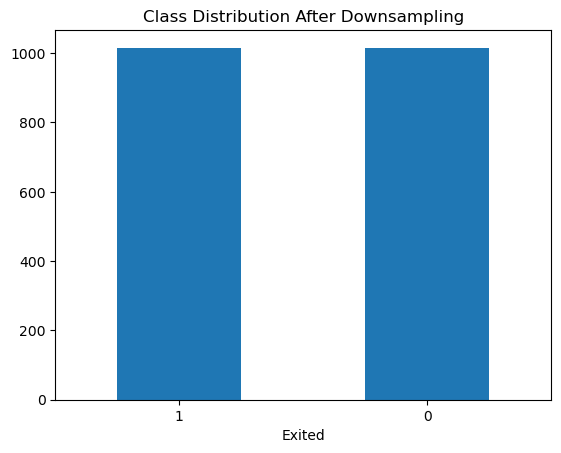

(2032, 11)
(2032,)


In [19]:
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.5, random_state=12345)
features_valid, features_test, target_valid, target_test = train_test_split(features_valid, target_valid, test_size=0.5, random_state=12345)

def downsample(features, target):
    features_ones = features[target == 1]
    target_ones = target[target == 1]
    features_zeros = features[target == 0]
    target_zeros = target[target == 0]
    
    features_zeros_downsampled = features_zeros.sample(n=len(target_ones), random_state=12345)
    target_zeros_downsampled = target_zeros.sample(n=len(target_ones), random_state=12345)
    
    features_downsampled = pd.concat([features_zeros_downsampled, features_ones])
    target_downsampled = pd.concat([target_zeros_downsampled, target_ones])
    
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train) 

numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
scaler = StandardScaler()
scaler.fit(features_downsampled[numeric])
features_downsampled[numeric] = scaler.transform(features_downsampled[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

target_downsampled.value_counts().plot(kind='bar',rot=1)
plt.title('Class Distribution After Downsampling')
plt.show()
print(features_downsampled.shape)
print(target_downsampled.shape)


In [20]:
# Logistic Regression hyperparameter tuning
best_c = 0
best_f1 = 0
for c in [0.01, 0.1, 1, 10]:
    model = LogisticRegression(solver='liblinear', random_state=12345, C=c)
    model.fit(features_downsampled, target_downsampled)
    predictions = model.predict(features_valid)
    current_f1 = f1_score(target_valid, predictions)
    print(f'C={c} => f1 score: {current_f1}, Accuracy Score: {accuracy_score(target_valid, predictions)}')
    if current_f1 > best_f1:
        best_f1 = current_f1
        best_c = c
print(f'Best C: {best_c} with f1 score: {best_f1}')

C=0.01 => f1 score: 0.46839080459770116, Accuracy Score: 0.704
C=0.1 => f1 score: 0.4540466392318244, Accuracy Score: 0.6816
C=1 => f1 score: 0.44399460188933876, Accuracy Score: 0.6704
C=10 => f1 score: 0.4430976430976431, Accuracy Score: 0.6692
Best C: 0.01 with f1 score: 0.46839080459770116


/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/lib/python3.

In [21]:
# Decision Tree hyperparameter tuning
best_f1 = 0
best_depth = 0
for depth in range(1, 21):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_downsampled, target_downsampled)
    predictions = model.predict(features_valid)
    current_f1 = f1_score(target_valid, predictions)
    if current_f1 > best_f1:
        best_f1 = current_f1
        best_depth = depth
print("Best max_depth:", best_depth)
print("Best f1 score on validation set:", best_f1)


Best max_depth: 5
Best f1 score on validation set: 0.5454545454545454


In [22]:
# Random Forest hyperparameter tuning
best_score = 0
best_depth = 0
best_est=0
for depth in range(1, 26):
    for est in range(1, 51):
        model = RandomForestClassifier(max_depth=depth, n_estimators=est, random_state=12345)
        model.fit(features_downsampled, target_downsampled)
        predictions = model.predict(features_valid)
        current_score = f1_score(target_valid, predictions)
        if current_score > best_score:
            best_score = current_score
            best_depth = depth
            best_est=est
print("Best max_depth:", best_depth)
print("Best est:", best_est)
print("Best F1 Score:", best_score)


Best max_depth: 6
Best est: 49
Best F1 Score: 0.5583145221971407


- The results of downsampling are underwhelming. 
- While model performance wasn't terrible it certainly wasn't in the realm of our previous testing. 
- Even though we balanced the classes through downsampling, the lack of overall data, compared to other balancing techniques, keeps our models from achieving our desired F1 score. 

## Testing Best Model:
- Testing will be conducted on 2 models due to similarities of results.
    - First we will test the Random Forest on the Upsampled data.
        - Achieved an F1 score of 0.58.
    - Second we will test the Random Forest with the parameter 'balanced'.
        - Achieved and F1 score of 0.59.

- Below we will test our models against our test data sets. 
    - This data has been witheld from previous model's training/testing.
    - Because the models haven't yet seen the data we will be able to get a good representation of how well our models can perform.
    - Ultimately we are in search of a model that produces an F1 score greater than 0.59.

### Random Forest on Upsampled Test Data:

Best max_depth: 11
Best est: 29
Best F1 Score: 0.5908256880733945
Accuracy Score: 0.842
Final Model Test Results:
f1 score: 0.6345454545454545
Accuracy Score: 0.8392


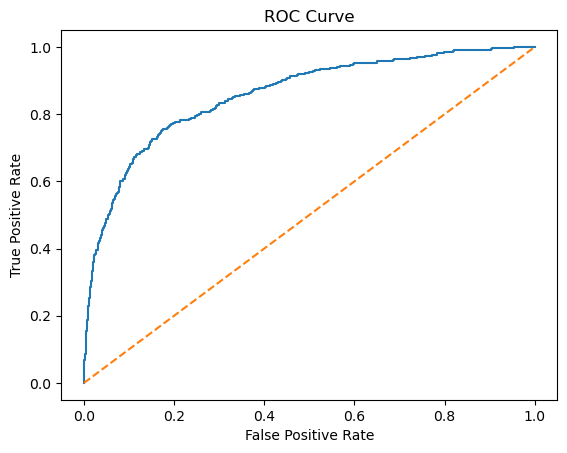

AUC-ROC: 0.8576527153593877


In [23]:
# Random Forest hyperparameter tuning
best_score = 0
best_depth = 0
best_est=0
for depth in range(1, 26):
    for est in range(1, 51):
        model = RandomForestClassifier(max_depth=depth, n_estimators=est, random_state=12345)
        model.fit(features_upsampled, target_upsampled)
        predictions = model.predict(features_valid)
        current_score = f1_score(target_valid, predictions)
        if current_score > best_score:
            best_score = current_score
            best_depth = depth
            best_est=est

print("Best max_depth:", best_depth)
print("Best est:", best_est)
print("Best F1 Score:", best_score)
print("Accuracy Score:",accuracy_score(target_valid, predictions))

# Final Model Test Results using Random Forest

print("Final Model Test Results:")
model = RandomForestClassifier(max_depth=best_depth, n_estimators=best_est, random_state=12345)
model.fit(features_upsampled, target_upsampled)
predictions = model.predict(features_test)
print('f1 score:',f1_score(target_test, predictions))
print('Accuracy Score:',accuracy_score(target_test, predictions))


probabilities = model.predict_proba(features_test)[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

print('AUC-ROC:', roc_auc_score(target_test, probabilities))

### Random Forest Class Weight 'Balanced' on Test Data:

Best Depth with class_weight=balanced: 9, Best Estimators: 21, Best f1 score: 0.5928705440900562
Final Model Test Results with class_weight='balanced':
f1 score: 0.6139534883720931
Accuracy Score: 0.834


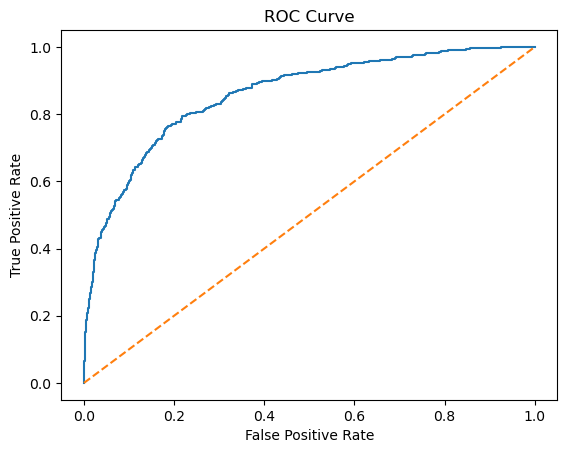

AUC-ROC: 0.8589290426760297


In [25]:
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.5, random_state=12345)
features_valid, features_test, target_valid, target_test = train_test_split(features_valid, target_valid, test_size=0.5, random_state=12345)

# Random Forest Classifier with class_weight='balanced' with hyperparameter tuning
best_depth = 0
best_f1 = 0
best_est = 0
for depth in range(1, 26):
    for est in range(1,51):
        model = RandomForestClassifier(max_depth=depth, n_estimators=est, random_state=12345, class_weight='balanced')
        model.fit(features_train, target_train)
        predictions = model.predict(features_valid)
        current_f1 = f1_score(target_valid, predictions)
        #print(f'Depth={depth}, Estimators={est}, f1 score={current_f1}')
        if current_f1 > best_f1:
            best_f1 = current_f1
            best_depth = depth
            best_est = est
print(f'Best Depth with class_weight=balanced: {best_depth}, Best Estimators: {best_est}, Best f1 score: {best_f1}')

# Final Model Test Results using Random Forest with class_weight='balanced'
print("Final Model Test Results with class_weight='balanced':")
model = RandomForestClassifier(max_depth=best_depth, n_estimators=best_est, random_state=12345, class_weight='balanced')
model.fit(features_train, target_train)
predictions = model.predict(features_test)
print('f1 score:',f1_score(target_test, predictions))
print('Accuracy Score:',accuracy_score(target_test, predictions))
probabilities = model.predict_proba(features_test)[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('AUC-ROC:', roc_auc_score(target_test, probabilities))


## Conclusion:

- After properly analyzing and preparing the data we have successfully achieved our goal of creating a model that can predict customer churn with an F1 Score greater than 0.59.
- Our RandomForestClassifier model on upsampled data achieved an F1 Score of 0.63 with an AUC-ROC of 0.85.
- Taking into account the ROC Curve you can all see that our model performs well across all thresholds. 
- While our model's AUC-ROC score isn't quite 0.9 we can still have extreme confidence in it's ability to predict customer churn, helping Beta Bank retain customers and save money.

- Worth noting:
    - Our class weight 'balanced' model did extremely well and achieved an F1 score of 0.61 with an AUC-ROC of 0.85.
    - These results were more than enough to achieve the goal we set out to accomplish. 
    - The similarities between the two models is no mistake: upsampling and 'balanced' are achieved roughly the same way.
        - While upsampling looks to balance data by increasing the minority class, class_weight 'balanced' adds weight to the minority class in effort to seek balance. 
        - Essentially our two techniques achieved the same goal of balancing the data, with the only real difference being the quantity of data between approaches.